In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pymc3 as pm
import pymc3.distributions.continuous as pmdc
import scipy.stats as stats

In [2]:
x = np.linspace(0.0, 1.0, 1000)
fig, ax = plt.subplots()
f = lambda a, b : st.beta.pdf(x, a, b)
#plot_pdf = lambda a, b : ax.plot(x, f(a,b), label=r'$\alpha$={0}, $\beta$={1}'.format(a,b))
plot_pdf(100, 100)
plot_pdf(1, 1)
plt.legend(loc='upper center', frameon=False)
ax.set(xlim=[0,1], ylim=[0,2.5], xlabel='x', ylabel='f(x)')
plt.show()

NameError: name 'plot_pdf' is not defined

In [24]:
model=pm.Model()
with model:
    a = pmdc.Beta("AB",alpha=1.0, beta=1.0)
    b = pm.sample(100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 97%|█████████▋| 582/600 [00:00<00:00, 1161.03it/s]/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/env/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:429: UserWarning: Chain 0 contains only 100 samples.
  % (self._chain_id, n))
100%|██████████| 600/600 [00:00<00:00, 1161.56it/s]


In [36]:
n = 6
h = 6
alpha = 100
beta = 100

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)
    
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)

logp = -inf, ||grad|| = 0: 100%|██████████| 3/3 [00:00<00:00, 738.39it/s]
100%|██████████| 1500/1500 [00:00<00:00, 5437.14it/s]


In [39]:
plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

ValueError: max must be larger than min in range parameter.

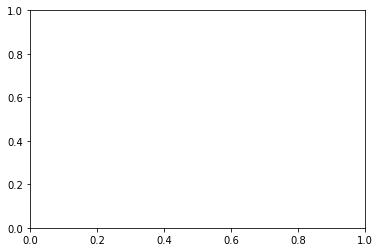

In [38]:
plt.show()